In [1]:
# importing libraries
import tweepy
import json
import pandas as pd
import requests as req
import re
import seaborn as sns
import numpy as np
import matplotlib as plt
%matplotlib inline

# <center> <h3>A: Data wrangling</h3> </center>


# A.1: Gathering data

In [2]:
# reading twitter-archive-enhanced file
df_twitter_archive_enhanced = pd.read_csv('/Users/mohammed/Desktop/Misk Academy-DAND/Project4/twitter-archive-enhanced.csv')
df_twitter_archive_enhanced_copy = df_twitter_archive_enhanced.copy()

In [3]:
# viewing dataframe head
df_twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_twitter_archive_enhanced_copy.shape

(2356, 17)

In [5]:
# url provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = req.get(url)
# checking content type and separator
request.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [6]:
# reading image_predictions file from the URL
df_image_predictions =  pd.read_csv(url, sep='\t')
df_image_predictions_copy = df_image_predictions.copy()

In [7]:
# viewing dataframe head
df_image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_image_predictions_copy.shape

(2075, 12)

In [9]:
# getting dataset info
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Important Note:

The code below is provided for students who had mobile verification issues. Furthermore, using the code below, all of the outputs were unsuccessful and all Id's fail to achieve the tweet status. The right output of the code is also provided in the Udacity classroom, so I copied the content then I paste it in the (tweet_json.txt) file

In [10]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_twitter_archive_enhanced_copy.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [11]:
# reading json file
df_json = pd.read_json('/Users/mohammed/Desktop/Misk Academy-DAND/Project4/tweet_json.txt', orient='records', lines = True)

In [12]:
# viewing columns to choose from them
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [13]:
# filtering json dataframe
df_json_filtered = df_json[['id','favorite_count', 'retweet_count', 'retweeted']]
df_json_filtered_copy = df_json_filtered.copy()

In [14]:
# viewing dataframe head
df_json_filtered_copy.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,39467,8853,False
1,892177421306343426,33819,6514,False
2,891815181378084864,25461,4328,False
3,891689557279858688,42908,8964,False
4,891327558926688256,41048,9774,False


In [15]:
df_json_filtered_copy.shape

(2354, 4)

# A.2: Assessing data

### A.2.1: twitter_archive_enhanced dataset

In [16]:
df_twitter_archive_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [17]:
# to see datatypes and count of missing values
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

We can see that there are some columns with missing values. Most of the columns don't have missing values.

In [18]:
df_twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
# printing count of names
df_twitter_archive_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Andru        1
Marq         1
Kendall      1
Stuart       1
Alf          1
Name: name, Length: 957, dtype: int64

I observed the following about name column:  
1- We can see that there are 745 names which contains None value.  
2- we can see names in two formats: names that start whit small letters and names that start with capital letters.Names starting with capital letters seems to be correct and names starting with small letters are incorrect.

In [20]:
# printing some informations for name column
df_twitter_archive_enhanced_copy.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [21]:
# rating_denominator count
df_twitter_archive_enhanced_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

we can see that most of the rating_denominator is 10. 

In [22]:
# floofer values count
df_twitter_archive_enhanced_copy.floofer.value_counts()  

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
# doggo values count
df_twitter_archive_enhanced_copy.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
# pupper values count
df_twitter_archive_enhanced_copy.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
# puppo values count
df_twitter_archive_enhanced_copy.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### A.2.2: image_predictions dataset

In [26]:
# showing the datafrmae columns
df_image_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [27]:
# to see datatypes and count of missing values
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


We can see here that there are no missing values in this dataset.

### A.2.3: json_filtered dataset

In [28]:
# showing the datafrmae columns
df_json_filtered_copy.columns

Index(['id', 'favorite_count', 'retweet_count', 'retweeted'], dtype='object')

In [29]:
# getting datafrme info
df_json_filtered_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


we can see here that we don't have any missing values.

### A.2.4: Asses targets 

##### Tidiness Issues  
- Datasets are not combined into in one dataset.  

- doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

##### Quality Issues  
Quality Issues in df_twitter_archive_enhanced_copy:
- Name column has incorrect values as we saw. (those that start with small letters)  
- Exclude Features that are related with retweets.
- rating_numerator has outliers.
- timestamp data type is incorrect.
- the length of df_twitter_archive_enhanced_copy is not the same as the length in df_image_predictions_copy which means that there are some ids that we need to remove.
- there are rating_denominator that are not equal to 10.  
- Source column in df_twitter_archive_enhanced_copy should be adjusted where only the source is kept.  
- ID columns like tweet_id should be of object type (i.e. strings).



# A.3: Cleaning data

## Quality 

#### Define:

Name column has incorrect values. (those that start with small letters)

#### code:

In [30]:
df_twitter_archive_enhanced_copy.shape

(2356, 17)

In [31]:
# list of common phrases that comes before the names
# the pattern I found is that after these phrases naems should start with non lower letter
# if it starts with a lower letter then it is not the correct name
# so the patteren is as follows:
# take the first word after these phrases
# if the word starts with a capiatal letter then it is a name and we will get this name
# if the word starts with a lower letter then it is not a name and we are going to ignore it.
list_pre_phrases = ['That is',
                    'Meet',
                    'Here we have',
                    'named',
                    'name is',
                    'Say hello to']
# take all names and convert them to string (somethimes they are nan)
list_names = [str(item) for item in df_twitter_archive_enhanced_copy.name.values.tolist()]
# take all texts
list_text = df_twitter_archive_enhanced_copy.text.values.tolist()
# correct_names container
list_correct_names = []
# for each index in list_names
for i in range(len(list_names)):
    # take the current name
    name = list_names[i]
    # assign new name as ''
    new_name = ''
    # here we will use this to know weather we found a correct name or not
    len_correct_names = len(list_correct_names)
    # if the name starts with lower letter or it is None or it is nan
    if name.islower() or name == 'None' or name == 'nan':
        # for each phrase
        for phrase in list_pre_phrases:
            # if phrase in the text
            if phrase in list_text[i]:
                # get the first word after the phrase
                new_name = list_text[i].split(phrase)[-1].strip().split(' ')[0].replace('.', '')
                # if the first word after the  pharse is lower
                if new_name.islower():
                    # ignore it and continue 
                    continue
                # else if we found the word starts with a capital letter
                else:
                    # append this word as a correct name in the list_Correct_names
                    list_correct_names.append(new_name)
    # if the name doesn't have probelms                                    
    else:
        list_correct_names.append(name)
        # append the name as is
    # this if condition will be useful for one case only. that is when 
    # the name starts with lower letter or it is None or it is nan
    # and we didn't find a correct names of all the phrases we have
    # simply we will compare current length of list_correct_names with len_correct_names ( that we took in the first
    # part of this for loop)
    # if they are equal that means we didn't find it, so we will let is append nan 
    # on the other hand if they are not equal we won't enter this if condtion
    if len(list_correct_names) == len_correct_names:
        list_correct_names.append(np.nan)

In [32]:
len(list_correct_names), len(list_names)

(2356, 2356)

In [33]:
df_twitter_archive_enhanced_copy.name = list_correct_names

#### Test:

In [34]:
# printing count of names
df_twitter_archive_enhanced_copy.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Tucker     10
           ..
Chuk        1
Stefan      1
JD          1
Boots       1
Alf         1
Name: name, Length: 959, dtype: int64

### Define:

Exclude features that are related with retweets

### Code:

In [35]:
# Number of retweets
len(df_twitter_archive_enhanced_copy[~df_twitter_archive_enhanced_copy['retweeted_status_id'].isnull()])

181

In [36]:
# exclude retweeted tweets
df_twitter_archive_enhanced_copy = df_twitter_archive_enhanced_copy[df_twitter_archive_enhanced_copy['retweeted_status_id'].isnull()]

### Test:

In [37]:
# Number of retweets
len(df_twitter_archive_enhanced_copy[~df_twitter_archive_enhanced_copy['retweeted_status_id'].isnull()])

0

### Define:

rating_numerator has outliers.


### Code:

In [38]:
def find_lower_and_upper_bound(lst):
    '''
    This function can be used to detect outliers.
    '''
    # getting q1 and q2
    q1, q3= np.percentile(lst,[25,75])
    IQR = q3- q1
    lower_bound = q1 - (1.5 * q1)
    upper_bound = q3 + (1.5 * q3)
    
    return lower_bound,upper_bound

In [39]:
# to be used for filtering
lower_bound,upper_bound = find_lower_and_upper_bound(df_twitter_archive_enhanced_copy.rating_numerator.values.tolist())

In [40]:
# number of outliers
len(df_twitter_archive_enhanced_copy[(df_twitter_archive_enhanced_copy.rating_numerator < lower_bound )
                            |( df_twitter_archive_enhanced_copy.rating_numerator > upper_bound)])

20

In [41]:
# exclude any record that contain ourlier
df_twitter_archive_enhanced_copy = df_twitter_archive_enhanced_copy[~((df_twitter_archive_enhanced_copy.rating_numerator < lower_bound )
                            |( df_twitter_archive_enhanced_copy.rating_numerator > upper_bound))]

### Test:

In [42]:
# number of outliers
len(df_twitter_archive_enhanced_copy[(df_twitter_archive_enhanced_copy.rating_numerator < lower_bound )
                            |( df_twitter_archive_enhanced_copy.rating_numerator > upper_bound)])

0

### Define:

timestamp data type is incorrect.

### Code:

In [43]:
# we can see here that the dataype for timestamp is object
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2155 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2155 non-null   object 
 4   source                      2155 non-null   object 
 5   text                        2155 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2101 non-null   object 
 10  rating_numerator            2155 non-null   int64  
 11  rating_denominator          2155 non-null   int64  
 12  name                        1422 non-null   object 
 13  doggo                       2155 

In [44]:
# converting datatype
df_twitter_archive_enhanced_copy.timestamp = pd.to_datetime(df_twitter_archive_enhanced_copy.timestamp)

### Test:

In [45]:
# we can see here that it is now datatime type
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2155 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2155 non-null   datetime64[ns, UTC]
 4   source                      2155 non-null   object             
 5   text                        2155 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2101 non-null   object             
 10  rating_numerator            2155 non-null   int64           

### Define:

the length of df_twitter_archive_enhanced_copy is not the same as the length in df_image_predictions_copy which means that there are some ids that we need to remove.

### Code:

In [46]:
# we can see here that there are 177 ids that are not in df_image_predictions_copy
len(df_twitter_archive_enhanced_copy[~df_twitter_archive_enhanced_copy.tweet_id.isin(df_image_predictions_copy.tweet_id)])

177

In [47]:
# exclude ids that are not in df_image_predictions_copy
df_twitter_archive_enhanced_copy = df_twitter_archive_enhanced_copy[df_twitter_archive_enhanced_copy.tweet_id.isin(df_image_predictions_copy.tweet_id)]

### Test:

In [48]:
# they were excluded
len(df_twitter_archive_enhanced_copy[~df_twitter_archive_enhanced_copy.tweet_id.isin(df_image_predictions_copy.tweet_id)])

0

### Define:

there are rating_denominator that are not equal to 10. 

### Code:

In [49]:
# fixing the rating_denominator and assign it to 10
df_twitter_archive_enhanced_copy.rating_denominator = 10

### Test:

In [50]:
# now we only have 10 in our rating_denominator
df_twitter_archive_enhanced_copy.rating_denominator.value_counts()

10    1978
Name: rating_denominator, dtype: int64

### Define

 Source column in df_twitter_archive_enhanced_copy should be adjusted where only the source is kept.  


### Code:

In [51]:
df_twitter_archive_enhanced_copy.groupby('source').size()

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1940
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
dtype: int64

In [52]:
def extract_source(x):
    list_sources_mapping = ['iPhone', 'Twitter Web Client','TweetDeck']
    for source_mapping in list_sources_mapping:
        if source_mapping in x:
            return source_mapping
    return 'other'

In [53]:
df_twitter_archive_enhanced_copy.source =  df_twitter_archive_enhanced_copy.source.map(lambda x: extract_source(x))

### Test:

In [54]:
# checking that the column was fixed
df_twitter_archive_enhanced_copy.source.value_counts()

iPhone                1940
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Define:

ID columns like tweet_id should be of object type (i.e. strings)

### Code:

In [55]:
df_twitter_archive_enhanced_copy.tweet_id = df_twitter_archive_enhanced_copy.tweet_id.astype(str)

In [56]:
df_image_predictions_copy.tweet_id = df_image_predictions_copy.tweet_id.astype(str)

In [57]:
df_json_filtered_copy.id = df_json_filtered_copy.id.astype(str)

### Test:

In [58]:
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1978 non-null   object             
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   1978 non-null   datetime64[ns, UTC]
 4   source                      1978 non-null   object             
 5   text                        1978 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1978 non-null   object             
 10  rating_numerator            1978 non-null   int64           

In [59]:
df_json_filtered_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   retweeted       2354 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 57.6+ KB


In [60]:
df_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Tidiness 

### Define

doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

### Code: 

In [61]:
list_stages = ['doggo','floofer','pupper','puppo']
for stage in list_stages:
    df_twitter_archive_enhanced_copy[stage] = df_twitter_archive_enhanced_copy[stage].map(lambda x: 1 if x == stage else 0)

In [62]:
df_twitter_archive_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [63]:
df_twitter_archive_enhanced_copy.groupby('doggo').size()

doggo
0    1904
1      74
dtype: int64

In [64]:
list_stages_raws = df_twitter_archive_enhanced_copy[['doggo', 'floofer', 'pupper', 'puppo']].values.tolist()

In [65]:
list_new_stages = []
dict_stages = {
    0:'doggo',
    1:'floofer',
    2:'pupper',
    3:'puppo'
}
for raw in list_stages_raws:
    if sum(raw) == 0:
        list_new_stages.append('No Stage')
    elif sum(raw) > 1:
        list_new_stages.append('multiple_stages')
    else:
        list_new_stages.append(dict_stages[raw.index(1)])

In [66]:
df_twitter_archive_enhanced_copy['dog_stages'] = list_new_stages

### Test:

In [67]:
df_twitter_archive_enhanced_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,No Stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,No Stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,No Stage
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0,No Stage
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0,No Stage


### Define:

Datasets are not combined into in one dataset

### Code:

In [68]:
df_twitter_archive_master = df_twitter_archive_enhanced_copy.merge(df_json_filtered_copy, how = 'left'  , \
                                                                   left_on='tweet_id', right_on='id')

In [69]:
# combining df_twitter_archive_master and df_image_predictions_copy
df_twitter_archive_master = pd.merge(left=df_twitter_archive_master,right=df_image_predictions_copy, \
                                     left_on='tweet_id', right_on='tweet_id', how = 'left')

In [70]:
df_twitter_archive_master.shape

(1978, 33)

### Test:

In [71]:
# we can see that now there are 32 columns in the master dataframe
df_twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Saving df_twitter_archive_master in a CSV file. 

In [72]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# <center> <h3>B: Data Analyzing and Visualizing</h3> </center>


In [73]:
def make_pie_chart(data, labels, title):
    '''
    This function is used to create pie charts of four elemnts
    '''
    explode = (0.01, 0.01,0.01,0.01)  # explode

    # Plot
    plt.pyplot.pie(data, labels=labels, explode=explode,
            autopct='%1.1f%%', startangle=150)


    #plt.pyplot.axis('equal')
    plt.pyplot.title(title)
    plt.pyplot.show()

In [74]:
# reading master dataset
df_twitter_archive_master = pd.read_csv("./twitter_archive_master.csv")

In [75]:
# viewing the cloumns to get idea about what to visualize
df_twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stages', 'id', 'favorite_count', 'retweet_count', 'retweeted',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Sources

In [76]:
# source column count
df_twitter_archive_master.source.value_counts()

iPhone                1940
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [77]:
# assign the count values to varibles to be used in creating the visual
source_iphone = df_twitter_archive_master.source.value_counts()[0]
source_Twitter_Web_Client = df_twitter_archive_master.source.value_counts()[1]
source_TweetDeck = df_twitter_archive_master.source.value_counts()[2]

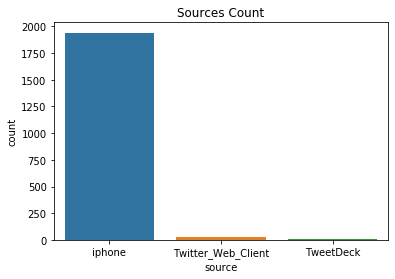

In [78]:
# creating temp datafrmae to create a bar chart
source = ['iphone','Twitter_Web_Client','TweetDeck']
count = [source_iphone,source_Twitter_Web_Client,source_TweetDeck]
data = {'source': source, 'count':count}
temp_df = pd.DataFrame(data)

#adding title
plt.pyplot.title("Sources Count")

x = sns.barplot(x="source", y="count", data=temp_df)


### Dog Stages

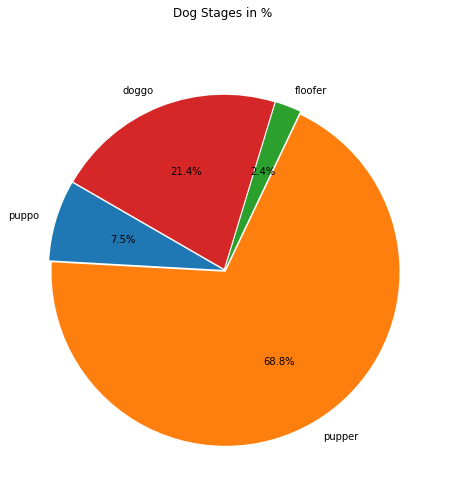

In [79]:
# setting values to plot 
fig, ax = plt.pyplot.subplots(figsize=(8,8))

# the sum for each stage
data = [len(df_twitter_archive_master[df_twitter_archive_master.dog_stages == 'puppo']),
        len(df_twitter_archive_master[df_twitter_archive_master.dog_stages == 'pupper']),
        len(df_twitter_archive_master[df_twitter_archive_master.dog_stages == 'floofer']),
       len(df_twitter_archive_master[df_twitter_archive_master.dog_stages == 'doggo'])]
# adding labels
labels = 'puppo', "pupper", "floofer","doggo"
# title
title = 'Dog Stages in % \n\n'

make_pie_chart(data, labels, title)

Dog Staging is one of the most important features. we can see here pupper is the most popular stage where it has more than 65%. Then in the second place, doggo where it has around 20%. And then comes puppo then floofer. 

### Pupper's Ratings

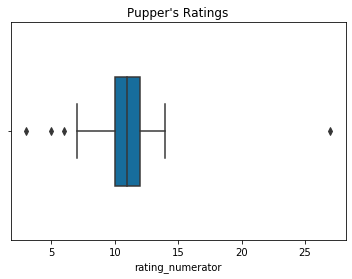

In [80]:
# keep only records for pupper
temp_df = df_twitter_archive_master[df_twitter_archive_master.dog_stages == 'pupper']

#title
plt.pyplot.title("Pupper's Ratings")

sns.boxplot( x='rating_numerator', 
                 data=temp_df, 
                 width=0.5,
                 palette="colorblind");

We can see here the rating values of the most common dog staging which was pupper.it's kind of normally distributed. the median here is around 11. The maximum is around 14 and the minimum is around 7.  

We also can see that there outliers on both sides above the maximum and below the minimum.

### Doggo's Ratings

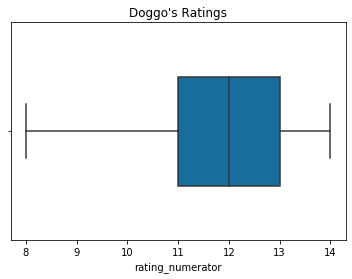

In [81]:
# keep only records for doggo
temp_df = df_twitter_archive_master[df_twitter_archive_master.dog_stages == 'doggo']

#title
plt.pyplot.title("Doggo's Ratings")


sns.boxplot( x='rating_numerator', 
                 data=temp_df, 
                 width=0.5,
                 palette="colorblind");

I also want to see how is the rating of doggo which was in the second place and compare it with pupper.  
We can see here the median is higher; it's about 12. And also we can notice the this dog staging is skewed unlike pupper.